<a href="https://colab.research.google.com/github/mari-rufino-g/ViolenciaContraMulher/blob/main/Violencia_Contra_Mulher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (5.0.0)


In [ ]:
!pip install geopandas

In [ ]:
#Importando pacotes necessários
import os
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#Importando arquivo - extraido do https://mapadaviolenciadegenero.com.br/
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reports.csv')

In [ ]:
df.head()

,Origem,Ano da Ocorrência,Estado da Ocorrência,Município da Ocorrência,Região da Ocorrência,Sexo,Raça,Local da Ocorrência,Meio da Agressão
0,SINAN,2018,SP,354340,SUDESTE,Mulher,Branca,outro,ameaca
1,SINAN,2018,SP,355030,SUDESTE,Mulher,Parda,residencia,NaN
2,SINAN,2018,SP,354580,SUDESTE,Mulher,Branca,via_publica,forca_corporal_ou_espancamento
3,SINAN,2018,SP,355030,SUDESTE,Mulher,Branca,outro,outros_tipos
4,SINAN,2018,SP,351340,SUDESTE,Mulher,Branca,residencia,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62528 entries, 0 to 62527
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Origem                   62528 non-null  object
 1   Ano da Ocorrência        62528 non-null  int64 
 2   Estado da Ocorrência     62528 non-null  object
 3   Município da Ocorrência  62528 non-null  int64 
 4   Região da Ocorrência     62528 non-null  object
 5   Sexo                     62528 non-null  object
 6   Raça                     56474 non-null  object
 7   Local da Ocorrência      62528 non-null  object
 8   Meio da Agressão         55456 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.3+ MB


Segundo dados disponibilizados pelo Sistema de Informação de Agravos de Notificação, no ano de 2018 no estado de SP foram registrados 62.527 ocorrências de violência contra mulheres

In [ ]:
ibge = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/municipios.csv')

In [ ]:
ibge.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15


In [ ]:
ibge.rename({"codigo_ibge": "Município da Ocorrência"}, axis=1, inplace=True)
ibge.head()

,Município da Ocorrência,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15


**Quais são os 5 municipios que mais tiveram registros?**

In [ ]:
df['Município da Ocorrência']. value_counts().head(5)

355030    19174
354870     2349
353060     1827
350950     1758
354980     1615
Name: Município da Ocorrência, dtype: int64

**Quais são os tipos de locais possíveis?**

In [ ]:
df['Local da Ocorrência'].unique()

array(['outro', 'residencia', 'via_publica', 'na', 'bar_ou_similar',
       'escola', 'habitacao_coletiva', 'local_de_pratica_esportiva',
       'comercio_ou_servicos', 'industrias_e_construcao'], dtype=object)

**E qual tipo de local mais comum ?**

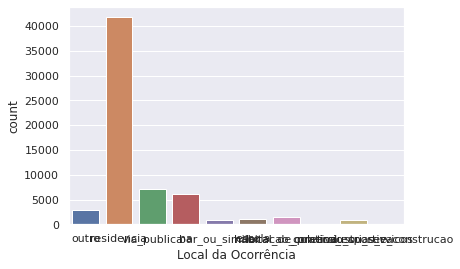

In [ ]:
sns.set() #criar um padrao do sns
sns.countplot(x='Local da Ocorrência', data=df)

**Qual é o tipo de agressão mais comum?**

In [ ]:
df['Meio da Agressão'].value_counts()

forca_corporal_ou_espancamento    28319
envenenamento                      8480
ameaca                             8365
outros_tipos                       5043
perfuro_cortante                   3233
objeto_contundente                  945
enforcamento                        592
substancia_ou_objeto_quente         274
arma_de_fogo                        205
Name: Meio da Agressão, dtype: int64

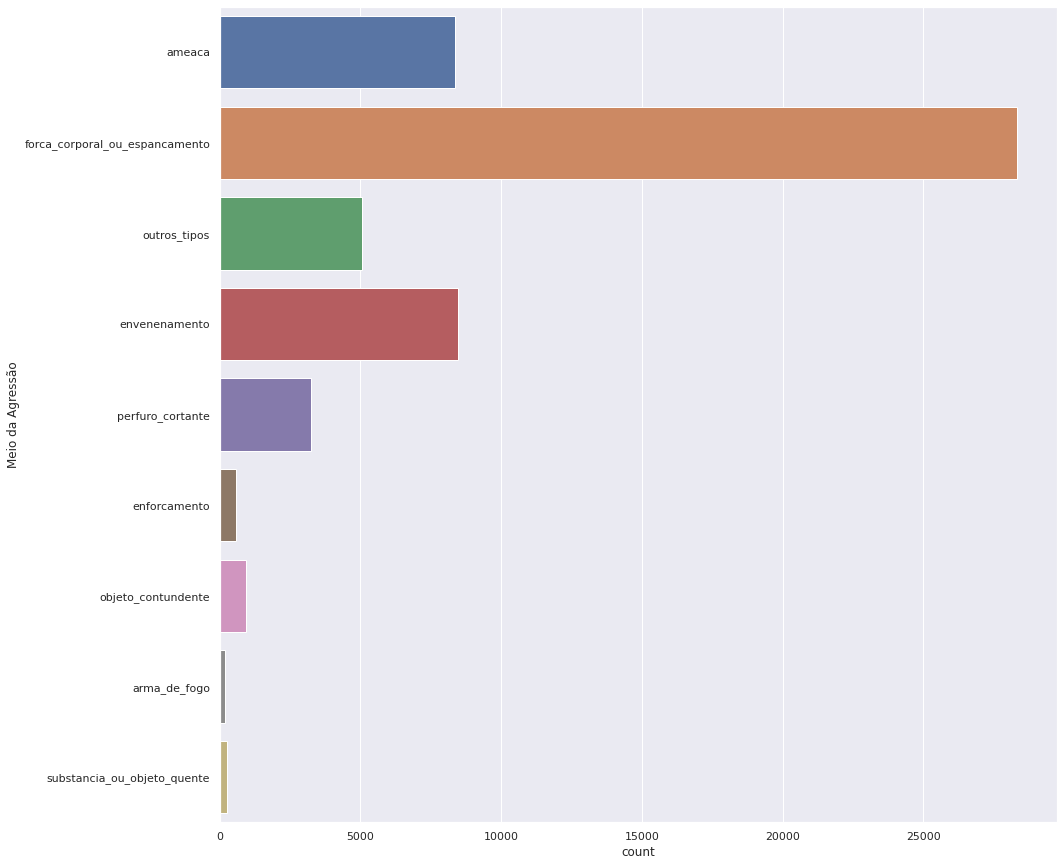

In [ ]:
sns.set() #criar um padrao do sns
f, ax = plt.subplots(figsize=(15, 15))
sns.countplot(y="Meio da Agressão", data=df)

**Qual a relação entre raça e número de ocorrências?**

In [ ]:
df['Raça'].value_counts()

Branca      33067
Parda       18297
Preta        4616
Amarela       327
Indigena      167
Name: Raça, dtype: int64

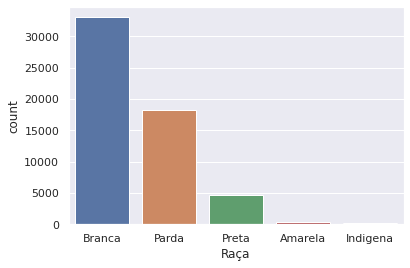

In [ ]:
sns.set() #criar um padrao do sns
sns.countplot(x='Raça', data=df)

**Quais são os tipos de agressão mais comum por raça da vítima?**

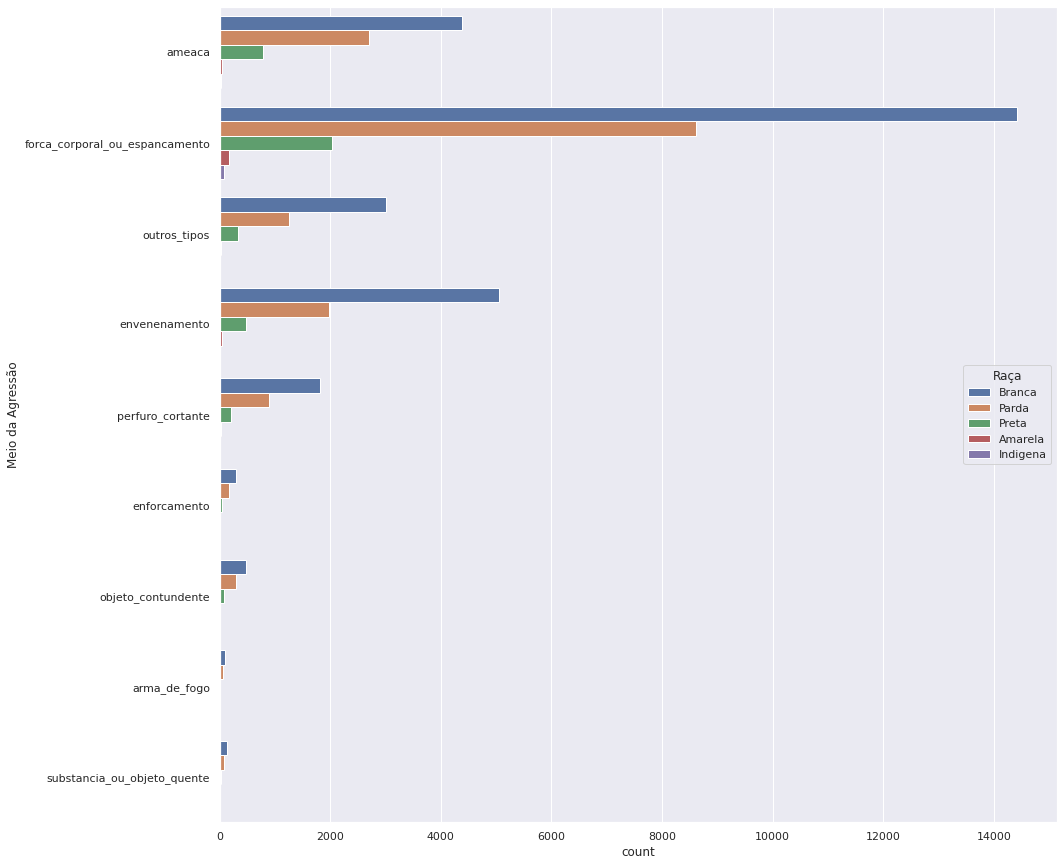

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
sns.countplot(y="Meio da Agressão", data=df, hue='Raça')

**Quais são os tipos de locais de ocorrência de agressão mais comum por raça da vítima?**

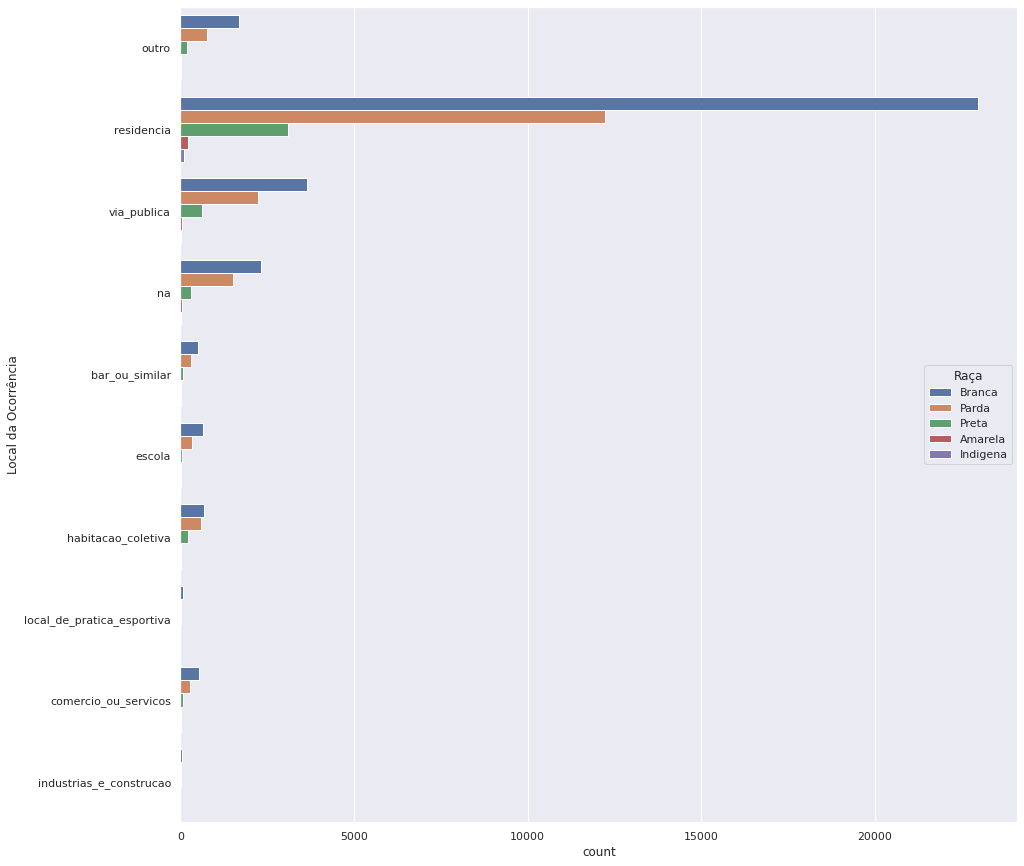

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
sns.countplot(y="Local da Ocorrência", data=df, hue='Raça')

**Verificando a relação entre raça e local da ocorrência**

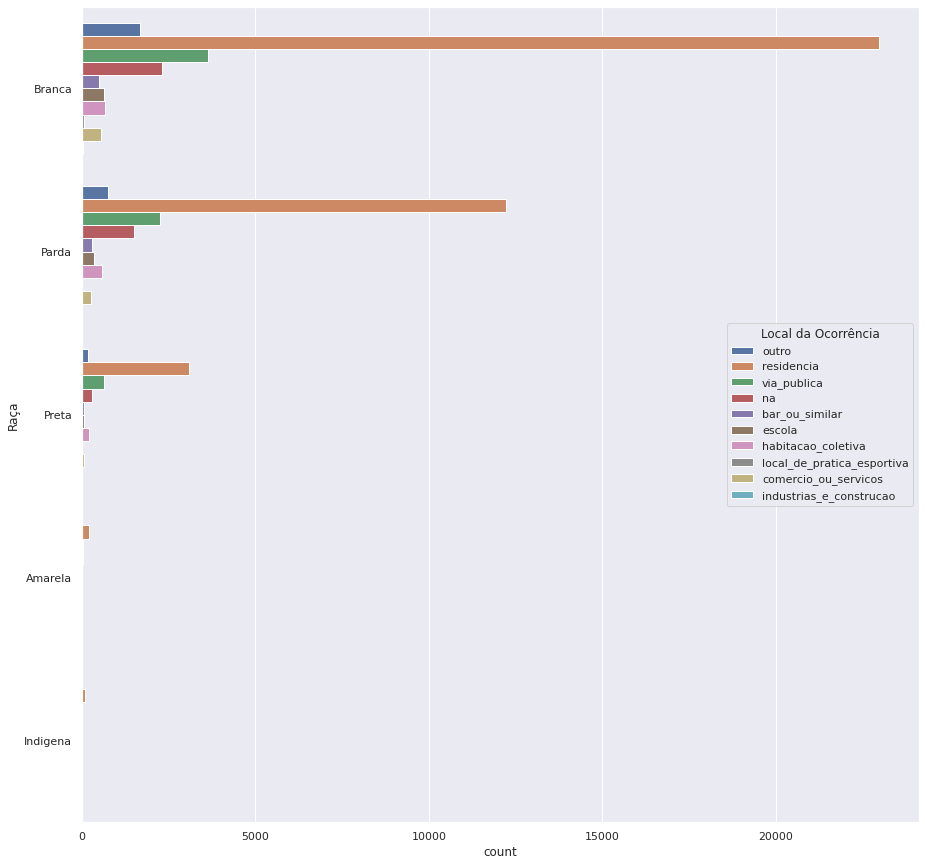

In [ ]:
sns.set() #criar um padrao do sns
f, ax = plt.subplots(figsize=(15, 15))
sns.countplot(y="Raça", data=df, hue='Local da Ocorrência')